## Random Numbers

In [1]:
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import time 
import scipy.stats as stats
import random as rn

In [2]:
def randomgen(x,n,a= float(125648),c =float(158756),m =(245018664)):
    output= []
    for i in range(n):
        x = (a*x + c)%m
        output.append(x)
    return output
    

In [3]:
print(randomgen(2,10))

[410052.0, 68453012.0, 94048140.0, 200726084.0, 80001012.0, 76623932.0, 125602140.0, 5697236.0, 146950140.0, 119886428.0]


In [4]:
def pstar(x,a=2.3):
    f = x**(-a)
#     print('function',f)
    return f

def p(x):
    z = quad(pstar,0.1,150)
#     print('what is z',z)
    return pstar(x)/z[0]  

In [5]:
# x=np.linspace(0.1,150,10)
# z = quad(pstar,0.1,150)
# print(z[0])
# plt.loglog(x,p(x))
# print(pstar(x)/z[0])

In [6]:
def cdf(Niteration = 10):
    x = np.linspace(0.1,10000,Niteration)
    f =np.cumsum(p(x))
    f/= np.max(f)
    return x,f

#plt.plot(cdf(100)[0],cdf(100)[1])


def inverse_sampling(Niteration = 10):
    sample =[]
    a,b = cdf(Niteration)
    print("length of a is:",len(a))
    for i in range(len(a)):
        u = np.random.uniform(0,1)
        z = a[np.argmin(np.abs(cdf(Niteration)[1]-u))]
        sample.append(z)
    return sample

    

length of a is: 100000


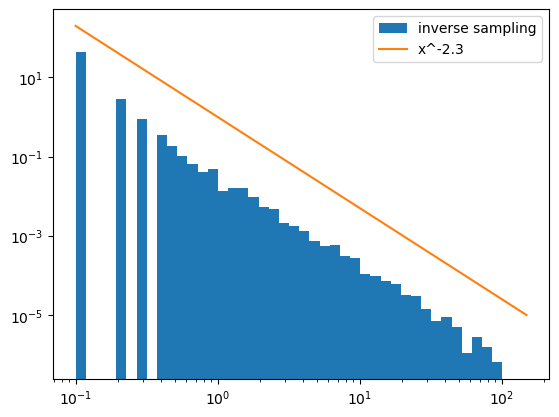

In [7]:
### Plot Histogram ####

mybins= np.logspace(-1,2.15,45)
plt.hist(inverse_sampling(100000),bins = mybins,density=True,histtype ='stepfilled',log = True,label = 'inverse sampling')
x=np.linspace(0.1,150,10)
P=pstar(x)
plt.loglog(x,P,label='x^-2.3')
plt.legend()



## Inverse sampling (Salpeter Mass Function)

15.347031041410887


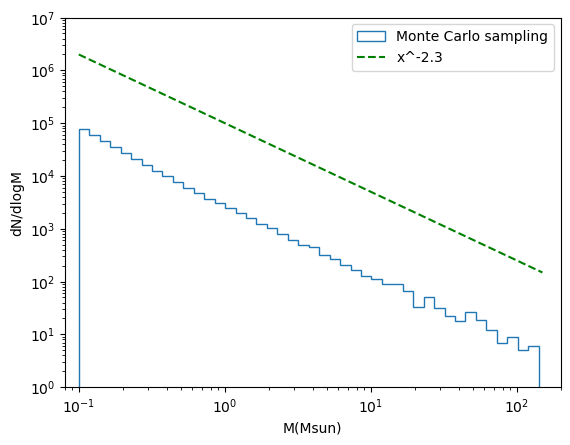

In [8]:
integrand = lambda x: x**(-2.3)
norm = quad(integrand,0.1,150)
print (norm[0])

def inverse(y,a = 2.3):
    m = ((a-1)*norm[0]*y)**(-1/1.3) # + (0.1)**(1-a))**(-1/1.3) 
    return m

def salpeter(x,a=2.3):
    f = 10**5*x**(-a)
#     print('function',f)
    return f


N = 10**6
mass = []
for i in range(N):
    y=np.random.normal(0,1)
    m=inverse(y)
    mass.append(m)
    

x=np.linspace(0.1,150)
plt.hist(mass,bins=np.logspace(-1,2.15,num=45),histtype='step',label='Monte Carlo sampling')
plt.xlim(8*10**-2,2*10**2)
plt.ylim(10**0,10**7)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('M(Msun)')
plt.plot(x,salpeter(x,a = 1.3),'g--',label='x^-2.3')
plt.ylabel('dN/dlogM')
plt.legend()

## Box Muller:
Used for sampling two independent random variable  x and y having same standard deviation. we change the coordinates so it is easier to sperate the varaible integrate it and get a uniform normal distribution, which can then be use for inverse sampling.
### Algorithm:
1. $z_1$ and $z_2$ are normal distribution  b\w 0 & 1<br>
2. $r = \sqrt{-2 \sigma^2 ln(1-z_1)}$ & $\theta = 2 \pi z_2$ <br>
3. $x= r cos(\theta)$  $y= r sin(\theta)$

In [9]:

def BoxMuller(n1,n2,sigma=2.0):
    r = np.sqrt(-2*sigma**2*np.log(1-n1))
    theta = 2*np.pi*n2
    x1 = r*np.cos(theta)
    y1 = r*np.sin(theta)
    return x1,y1
print(BoxMuller(0.2,0.3))
N =10**5
x = []
y = []
for i in range(N):
    z1 = np.random.rand()
    z2 = np.random.rand()
    BoxResult = BoxMuller(z1,z2)
    x.append(BoxResult[0])
    y.append(BoxResult[1])

 

(-0.4128758947472516, 1.2707013441601194)


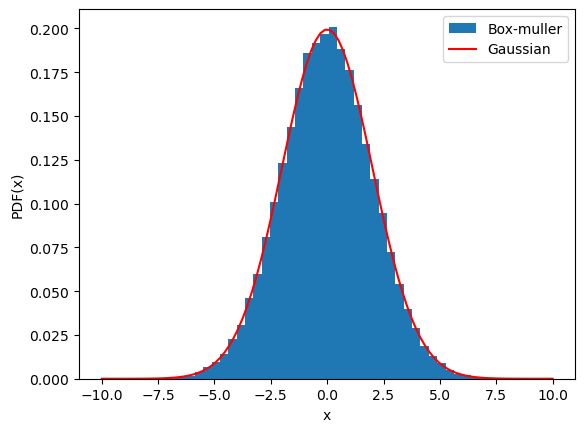

In [10]:
#### PLOT ######
plt.hist(x,bins=45,density=True,label = 'Box-muller')
plt.xlabel('x')
plt.ylabel('PDF(x)')

####The normal function ####
x1=np.linspace(-10,10,100)
plt.plot(x1, stats.norm.pdf(x1,0.,2.0), 'r', label='Gaussian')
plt.legend()
plt.show()

### Rejection Sampling

In [3]:
def gaussian(x):
    q = stats.norm.pdf(x, loc=0, scale=2)
    return q
output=[]
minm = -50.
maxm = 50.
g = maxm-minm
N = 10000
print(g)
i=0.
while i < N:
    
    y=np.random.uniform(0,100)
    x = y+minm
    p =gaussian(x)
    u = np.random.rand()###we chose between (0,f(x)=1(in our case))
    if u<=p:
        output.append(x)
        i+=1

# print(sample)   
    


100.0


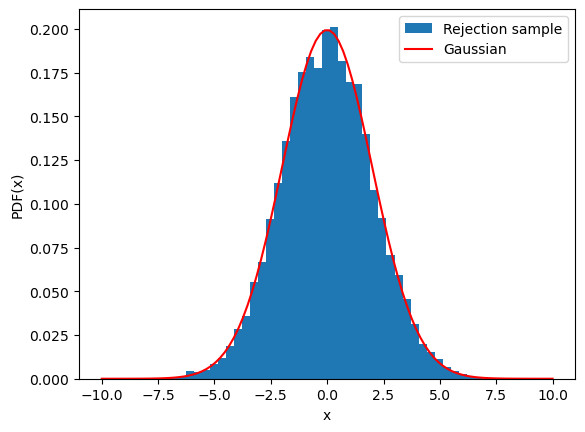

In [4]:
plt.hist(output,bins=40,density=True,label = 'Rejection sample')
plt.xlabel('x')
plt.ylabel('PDF(x)')
x1=np.linspace(-10,10,100)
plt.plot(x1, stats.norm.pdf(x1,0.,2.), 'r', label='Gaussian')
plt.legend()

100.0


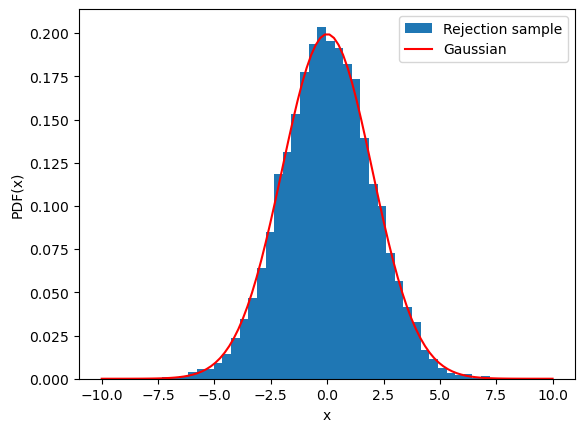

In [14]:
def gaussian(x):
    q = stats.norm.pdf(x, loc=0, scale=2)
    return q
output=[]
minm = -50.
maxm = 50.
g = maxm-minm
N = 1000000
print(g)

for i in range(N):
    
    y=np.random.rand()*(g)
    x = y+minm
    p =gaussian(x)
    u = np.random.rand()###we chose between (0,f(x)=1(in our case))
    if u<=p:
        output.append(x)
        i+=1

# print(sample)   
plt.hist(output,bins=40,density=True,label = 'Rejection sample')
plt.xlabel('x')
plt.ylabel('PDF(x)')
x1=np.linspace(-10,10,100)
plt.plot(x1, stats.norm.pdf(x1,0.,2.), 'r', label='Gaussian')
plt.legend()  